# **Introduction**

**In this kernel,we will be learning about Convolution neural networks.We will learn**
- [how to prepare your data to feed to a neural network](#1)
- [how convolution neural network works](#2)
- [how to implement cnn in keras](#3)
- [how to evaluvate your results](#4)
- [how to use keras pretrained network to improve your model](#5)
- [how to predict and  create a submission](#6)
   

**if you like my kernel,please consider upvoting**

![](https://media.giphy.com/media/BmmfETghGOPrW/giphy.gif)

and it's no rocket science,its fun.

### Loading required libraries

In [1]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
print(os.listdir("../input"))

import numpy as np



Using TensorFlow backend.


['test', 'train', 'train.csv', 'sample_submission.csv']


### Setting our directories

In [2]:
train_dir="../input/train/train"
test_dir="../input/test/test"
train=pd.read_csv('../input/train.csv')

df_test=pd.read_csv('../input/sample_submission.csv')

## Getting a basic idea

In [3]:
train.head(5)
train.has_cactus=train.has_cactus.astype(str)

In [4]:
print('out dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

out dataset has 17500 rows and 2 columns


In [5]:
train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [6]:
print("The number of rows in test set is %d"%(len(os.listdir('../input/test/test'))))

The number of rows in test set is 4000


### Displaying an image

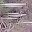

In [7]:
Image(os.path.join("../input/train/train",train.iloc[0,0]),width=250,height=250)

## Data preparation [](#1)  <a id="1"></a> <br>

As you know,data should be processed into appropriatly pre-processed floating point 
tensors before being fed to our network.So the steps for getting it into our network are roughly 

- Read the picture files
- Decode JPEG content to RGB pixels
- Convert this into floating tensors
- Rescale pixel values (between 0 to 255) to [0,1] interval.

we will make use of ImageDataGenerator method available in keras to do all the preprocessing.

In [8]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

**flow_from_dataframe Method**

This method is useful when the images are clustered in only one folder. To put in other words images from different class/labels reside in only one folder. Generally, with such kind of data, some text files containing information on class and other parameters are provided. In this case, we will create a dataframe using pandas and text files provided, and create a meaningful dataframe with columns having file name (only the file names, not the path) and other classes to be used by the model. For this method, arguments to be used are:

    dataframe value : Dataframe having meaningful data (file name, class columns are a must)
    directory value : The path to the parent directory containing all images.
    x_col value : which will be the name of column(in dataframe) having file names
    y_col value : which will be the name of column(in dataframe) having class/label

In [9]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))

Found 15001 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### Splitting our train and validation dataset

Now,after preprocessing is done with our data we will split our dataset to
training and validation for training our model and validating the result repectively.
We will take first 15000 images to train our data and last 2500 images to validate our model later.


## A brief intro to CNN[](#2) <a id='2'> </a><br>

The convolution operation is the building block of a convolutional neural network as the name suggests it.
Now, in the field of computer vision, an image can be expressed as a matrix of RGB values.
Therefore, let’s consider the 6x6 matrix below as a part of an image:
![](https://cdn-images-1.medium.com/max/800/1*aGSthcPASa2OT1UBm7paOA.png)
And the filter will be the following matrix:
![](https://cdn-images-1.medium.com/max/800/1*591OPcvDKUN9liZ_VQ1M5g.png)
Then, the convolution involves superimposing the filter onto the image matrix, adding the product of the values from the filter and and the values from the image matrix, which will generate a 4x4 convoluted layer.

This is very hard to put in words, but here is a nice animation that explains the convolution:
![](https://cdn-images-1.medium.com/max/800/1*VJCoCYjnjBBtWDLrugCBYQ.gif)

Convolutions are defined on two key parameters
- The size of patches that are extracted from input feature map..ie here 3x3
- The number of filters computed from convolutions

### Maxpooling

Maxpooling consist of extracting features from input feature map and outputig maximum value of each channel.
![](https://cdn-images-1.medium.com/max/800/1*Ziqq69FhwOAbBi9-FNruAA.png)

## Building our model [](#3) <a id="3"></a><br> 

[](http://)Now we will build our network.We will build our model such that it contains
5 **Conv2D + Maxpooling2D stages** with **relu** activation function.

In [10]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
         

Instructions for updating:
Colocations handled automatically by placer.


### Displaying summary of our network

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Compiling our model

In this step we will specify 3 important things related to our model


- loss: we will set our loss as binary_crossentropy since we are
   attacking a binary classification problem
- optimizer : optimizers shape and mold your model into its most accurate possible form by futzing with the weights.
- metrics : This is the evaluation criteria that we choose to evaluate our model

![](https://blog.algorithmia.com/wp-content/uploads/2018/05/word-image.png)

In [12]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.rmsprop(),metrics=['acc'])


### Fitting our model 

Here we will use keras fit_generator() method instead of fit() method because we have used ImageDataGenerator to generate values.


In [13]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 39s 394ms/step - loss: 0.5635 - acc: 0.8113 - val_loss: 0.2326 - val_acc: 0.9188
Epoch 2/10
100/100 [==============================] - 24s 237ms/step - loss: 0.2046 - acc: 0.9185 - val_loss: 0.1487 - val_acc: 0.9388
Epoch 3/10
100/100 [==============================] - 24s 237ms/step - loss: 0.1487 - acc: 0.9436 - val_loss: 0.2846 - val_acc: 0.9080
Epoch 4/10
100/100 [==============================] - 24s 240ms/step - loss: 0.1286 - acc: 0.9531 - val_loss: 0.2111 - val_acc: 0.9156
Epoch 5/10
100/100 [==============================] - 24s 237ms/step - loss: 0.1029 - acc: 0.9589 - val_loss: 0.1168 - val_acc: 0.9592
Epoch 6/10
100/100 [==============================] - 24s 237ms/step - loss: 0.0864 - acc: 0.9678 - val_loss: 0.1003 - val_acc: 0.9592
Epoch 7/10
100/100 [==============================] - 24s 236ms/step - loss: 0.0872 - acc: 0.9716 - val_loss: 0.1817 - val_acc: 0.9388
Epoch 8

## Evaluating our model[](#4)<a id="4"></a><br>

we will plot our results using matplotlib.first we will plot training and validation accuracy.

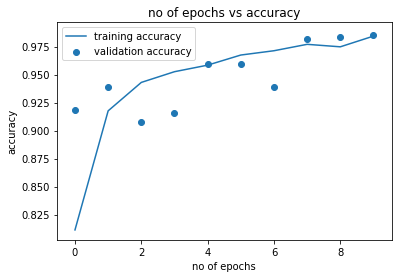

In [14]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()




    

Now we will plot training loss and validation loss vs number of epochs

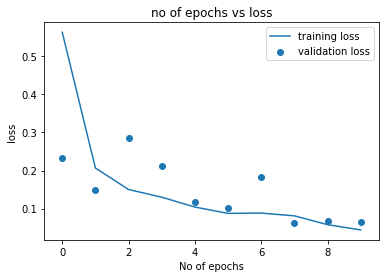

In [15]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

## Improving our model using VGG16[](#5)<a id="5"></a><br> 

- Instantiating the VGG16 convolution base

In [16]:
model_vg=VGG16(weights='imagenet',include_top=False)
model_vg.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool

### Extracting features using VGG16

In [17]:
def extract_features(directory,samples,df):
    
    
    features=np.zeros(shape=(samples,4,4,512))
    labels=np.zeros(shape=(samples))
    generator=datagen.flow_from_dataframe(dataframe=df,directory=directory,x_col='id',
                                            y_col='has_cactus',class_mode='other',batch_size=batch_size,
                                            target_size=(150,150))
    i=0
    for input_batch,label_batch in generator:
        feature_batch=model_vg.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if(i*batch_size>samples):
            break
    return(features,labels)

train.has_cactus=train.has_cactus.astype(int)
features,labels=extract_features(train_dir,17500,train)
train_features=features[:15001]
train_labels=labels[:15001]

validation_features=features[15000:]
validation_labels=labels[15000:]



Found 17500 images.


### Reshaping our features to feed into our dense layers

In [18]:
#df_test.has_cactus=df_test.has_cactus.astype(str)
test_features,test_labels=extract_features(test_dir,4000,df_test)

Found 4000 images.


In [19]:
train_features=train_features.reshape((15001,4*4*512))
validation_features=validation_features.reshape((2500,4*4*512))

test_features=test_features.reshape((4000,4*4*512))


### Define a densely connected network

In [20]:
model=models.Sequential()
model.add(layers.Dense(212,activation='relu',kernel_regularizer=regularizers.l1_l2(.001),input_dim=(4*4*512)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.compile(optimizer=optimizers.rmsprop(),loss='binary_crossentropy',metrics=['acc'])

In [22]:
history=model.fit(train_features,train_labels,epochs=30,batch_size=15,validation_data=(validation_features,validation_labels))

Train on 15001 samples, validate on 2500 samples
Epoch 1/30
15001/15001 [==============================] - 5s 352us/step - loss: 1.4906 - acc: 0.8940 - val_loss: 1.2673 - val_acc: 0.8724
Epoch 2/30
15001/15001 [==============================] - 5s 317us/step - loss: 1.1491 - acc: 0.9299 - val_loss: 1.2668 - val_acc: 0.8636
Epoch 3/30
15001/15001 [==============================] - 5s 318us/step - loss: 1.1200 - acc: 0.9368 - val_loss: 1.0743 - val_acc: 0.9672
Epoch 4/30
15001/15001 [==============================] - 5s 330us/step - loss: 1.1101 - acc: 0.9398 - val_loss: 1.0446 - val_acc: 0.9608
Epoch 5/30
15001/15001 [==============================] - 5s 316us/step - loss: 1.1045 - acc: 0.9389 - val_loss: 1.0382 - val_acc: 0.9692
Epoch 6/30
15001/15001 [==============================] - 5s 320us/step - loss: 1.1008 - acc: 0.9397 - val_loss: 1.1922 - val_acc: 0.8924
Epoch 7/30
15001/15001 [==============================] - 5s 317us/step - loss: 1.1012 - acc: 0.9401 - val_loss: 1.1909 - v

## making prediction

In [23]:
y_pre=model.predict_proba(test_features)

## Making a submission[](#6)<a id="6"></a><br>

In [24]:
df=pd.DataFrame({'id':df_test['id'] })
df['has_cactus']=y_pre
df.to_csv("submission.csv",index=False)


### If you guys like my kernel,please do consider upvoting it.